<a href="https://colab.research.google.com/github/Dcodinginsane/Pandas-for-Data-Analysis/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Explatory Data Analysis Project On Retails

### Content
Attribute Information:

* **invoice_no:** Invoice number. Nominal. A combination of the letter ‘I’ and a 6-digit integer uniquely assigned to each operation.

* **customer_id:** Customer number. Nominal. A combination of the letter ‘C’ and a 6-digit integer uniquely assigned to each operation.

* **gender:** String variable of the customer’s gender.

* **age:** Positive Integer variable of the customers age.

* **category:** String variable of the category of the purchased product.

* **quantity:** The quantities of each product (item) per transaction. Numeric.

* **price:** Unit price. Numeric. Product price per unit in Turkish Liras (TL).

* **payment_method:** String variable of the payment method (cash, credit card or debit card) used for the transaction.

* **invoice_date:** Invoice date. The day when a transaction was generated.

* **shopping_mall:** String variable of the name of the shopping mall where the transaction was made.

In [4]:
import numpy as np
import pandas as pd


import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import figure

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 500)

In [5]:
dataset = pd.read_csv("/content/customer_shopping_data.csv")
df = dataset.copy()

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [6]:
def check_df(dataframe, head = 5):
    print("#"*30 + " "+ "Dataset Shape"+ " " + "#"*30)
    print(dataframe.shape)
    print("#"*30 + " "+ "Dataset Dtypes"+ " " + "#"*30)
    print(dataframe.dtypes)
    print("#"*30 + " "+ "First 5 Rows Of Dataset"+ " " + "#"*30)
    print(dataframe.head(head))
    print("#"*30 + " "+ "Last 5 Rows Of Dataset"+ " " + "#"*30)
    print(dataframe.tail(head))
    print("#"*30 + " "+ "Is There Any NaN Observation In Dataset ?"+ " " + "#"*30)
    print(dataframe.isnull().sum())
    print("#"*30 + " "+ "Descriptive Statics About to (Default) Numerical Features"+ " " + "#"*30)
    print(dataframe.describe().T)
    print("#"*30 + " "+ "Quantile Values of (Default) Numerical Features"+ " " + "#"*30)
    print(dataframe.quantile([0.00, 0.05, 0.25, 0.50, 0.75, 0.95, 1.00]).T)

In [7]:
def unique_categories(dataframe):
    cat_cols = dataframe.select_dtypes(include=['object']).columns
    res = pd.DataFrame(columns=['Column', 'Unique Values', 'Value Counts'])
    for col in cat_cols:
        n_unique = dataframe[col].nunique()
        if n_unique < 15:
            value_counts = dataframe[col].value_counts().to_dict()
            res = res.append({'Column': col, 'Unique Values': n_unique, 'Value Counts': value_counts}, ignore_index=True)
        else:
            res = res.append({'Column': col, 'Unique Values': n_unique, 'Value Counts': {}}, ignore_index=True)
    return res

In [8]:
result = unique_categories(df)
print(result)

           Column Unique Values                                       Value Counts
0      invoice_no         99457                                                 {}
1     customer_id         99457                                                 {}
2          gender             2                   {'Female': 59482, 'Male': 39975}
3        category             8  {'Clothing': 34487, 'Cosmetics': 15097, 'Food ...
4  payment_method             3  {'Cash': 44447, 'Credit Card': 34931, 'Debit C...
5    invoice_date           797                                                 {}
6   shopping_mall            10  {'Mall of Istanbul': 19943, 'Kanyon': 19823, '...


<ipython-input-7-75c3d6a68e58>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'Column': col, 'Unique Values': n_unique, 'Value Counts': {}}, ignore_index=True)
<ipython-input-7-75c3d6a68e58>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'Column': col, 'Unique Values': n_unique, 'Value Counts': {}}, ignore_index=True)
<ipython-input-7-75c3d6a68e58>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.append({'Column': col, 'Unique Values': n_unique, 'Value Counts': value_counts}, ignore_index=True)
<ipython-input-7-75c3d6a68e58>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = res.ap

In [9]:
def plot_categorical_frequencies(df, n_unique=10, figsize=(8, 6), orient='h'):
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        n = df[col].nunique()
        if n <= n_unique:
            plt.figure(figsize=figsize)
            ax = sns.countplot(x=col, data=df, orient=orient)
            ax.set_title(col)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')
            total = float(len(df))
            for p in ax.patches:
                height = p.get_height()
                if orient == 'h':
                    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1%}'.format(height/total), ha="center")
                else:
                    ax.text(height + 3, p.get_y() + p.get_height() / 2., '{:.1%}'.format(height/total), va="center")
            plt.show()

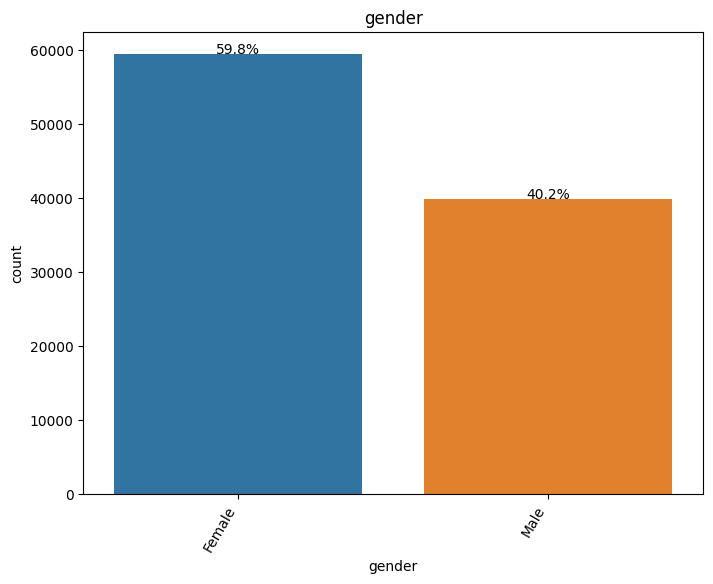

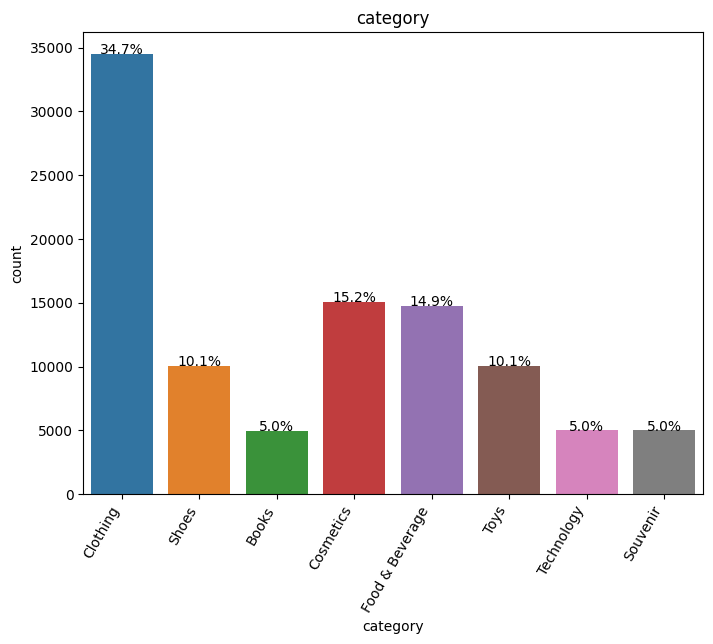

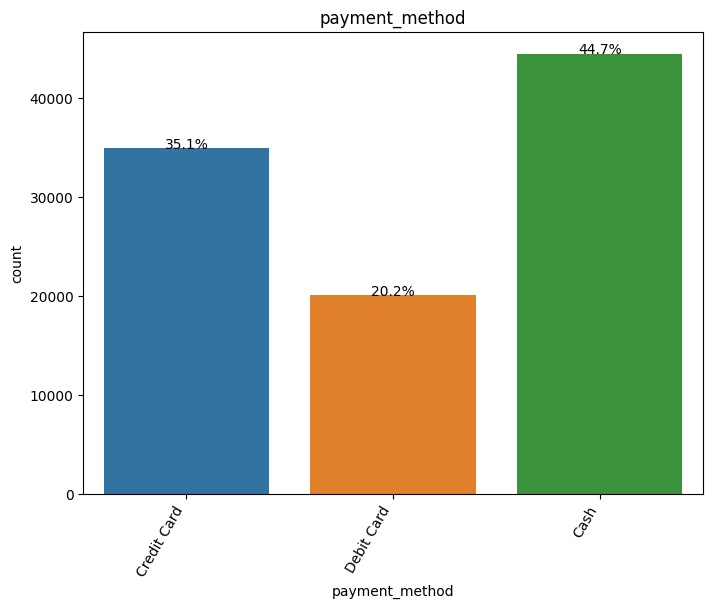

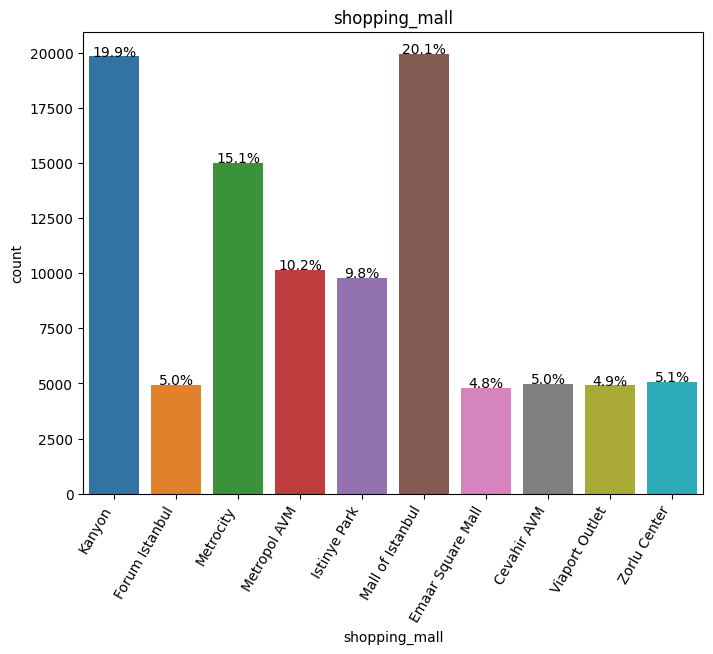

In [10]:
plot_categorical_frequencies(df, 10, (8,6), 'h')

In [11]:
df['TotalSales'] = df['quantity'] * df['price']

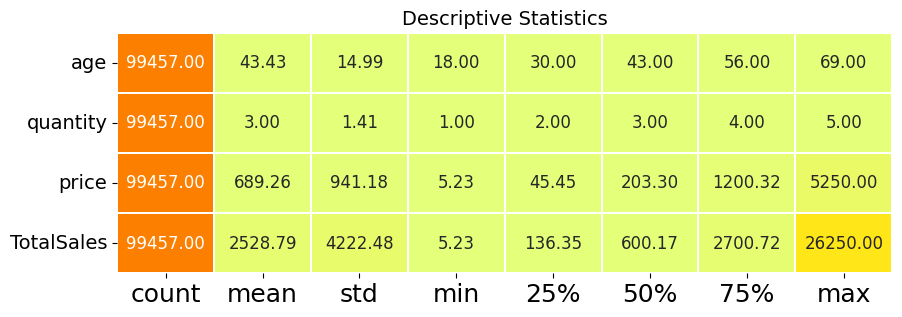

In [12]:
def desc_stats(dataframe):
    desc = dataframe.describe().T
    desc_df = pd.DataFrame(index= dataframe.columns,
                           columns= desc.columns,
                           data= desc)

    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0]*0.78))
    sns.heatmap(desc_df,
                annot=True,
                cmap = "Wistia",
                fmt= '.2f',
                ax=ax,
                linecolor='white',
                linewidths = 1.3,
                cbar = False,
                annot_kws={"size": 12})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()


desc_stats(df[[col for col in df.columns if df[col].dtype != 'O']])

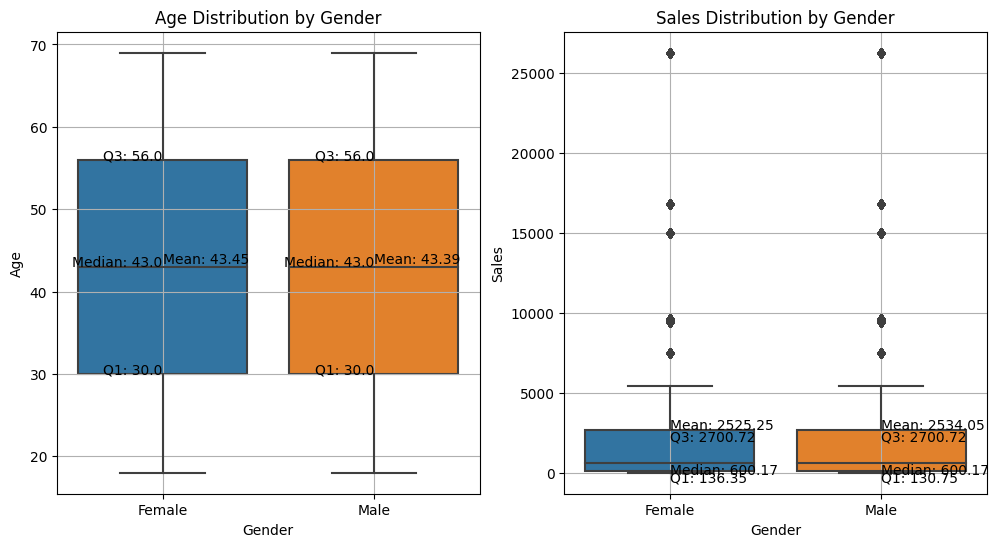

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

sns.boxplot(x="gender", y="age", data=df, ax=ax1)
sns.boxplot(x="gender", y="TotalSales", data=df, ax=ax2)

ax1.set_title("Age Distribution by Gender")
ax1.set_xlabel("Gender")
ax1.set_ylabel("Age")
ax1.grid(True)

ax2.set_title("Sales Distribution by Gender")
ax2.set_xlabel("Gender")
ax2.set_ylabel("Sales")
ax2.grid(True)

female_stats_age = df.groupby("gender")["age"].describe().loc["Female"]
male_stats_age = df.groupby("gender")["age"].describe().loc["Male"]

female_stats_sales = df.groupby("gender")["TotalSales"].describe().loc["Female"]
male_stats_sales = df.groupby("gender")["TotalSales"].describe().loc["Male"]


ax1.text(0, female_stats_age["25%"], f"Q1: {female_stats_age['25%']}", horizontalalignment="right")
ax1.text(0, female_stats_age["50%"], f"Median: {female_stats_age['50%']}", horizontalalignment="right")
ax1.text(0, female_stats_age["75%"], f"Q3: {female_stats_age['75%']}", horizontalalignment="right")
ax1.text(0, female_stats_age["mean"], f"Mean: {female_stats_age['mean']:.2f}", horizontalalignment="left")

ax1.text(1, male_stats_age["25%"], f"Q1: {male_stats_age['25%']}", horizontalalignment="right")
ax1.text(1, male_stats_age["50%"], f"Median: {male_stats_age['50%']}", horizontalalignment="right")
ax1.text(1, male_stats_age["75%"], f"Q3: {male_stats_age['75%']}", horizontalalignment="right")
ax1.text(1, male_stats_age["mean"], f"Mean: {male_stats_age['mean']:.2f}", horizontalalignment="left")

ax2.text(0, female_stats_sales["25%"], f"Q1: {female_stats_sales['25%']:.2f}", verticalalignment="top")
ax2.text(0, female_stats_sales["50%"], f"Median: {female_stats_sales['50%']:.2f}", verticalalignment="top")
ax2.text(0, female_stats_sales["75%"], f"Q3: {female_stats_sales['75%']:.2f}", verticalalignment="top")
ax2.text(0, female_stats_sales["mean"], f"Mean: {female_stats_sales['mean']:.2f}", verticalalignment="bottom")

ax2.text(1, male_stats_sales["25%"], f"Q1: {male_stats_sales['25%']:.2f}", verticalalignment="top")
ax2.text(1, male_stats_sales["50%"], f"Median: {male_stats_sales['50%']:.2f}", verticalalignment="top")
ax2.text(1, male_stats_sales["75%"], f"Q3: {male_stats_sales['75%']:.2f}", verticalalignment="top")
ax2.text(1, male_stats_sales["mean"], f"Mean: {male_stats_sales['mean']:.2f}", verticalalignment="bottom")

plt.show()

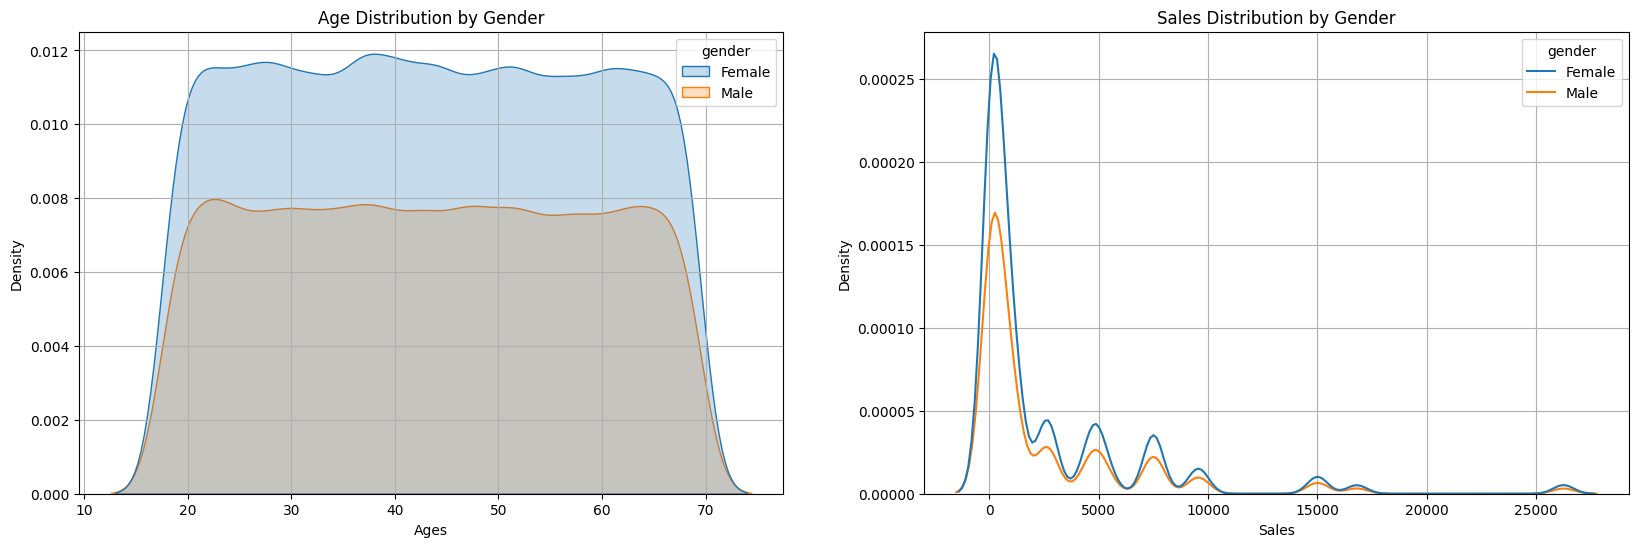

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

sns.kdeplot(x="age", hue="gender", data=df, fill=True, ax=ax1)
sns.kdeplot(x="TotalSales", hue="gender", data=df, ax=ax2)

ax1.set_title("Age Distribution by Gender")
ax1.set_xlabel("Ages")
ax1.set_ylabel("Density")
ax1.grid(True)

ax2.set_title("Sales Distribution by Gender")
ax2.set_xlabel("Sales")
ax2.set_ylabel("Density")
ax2.grid(True)

In [15]:
df.loc[:, 'NEW_AGE_CAT'] = pd.cut(df['age'], bins = [0,18,25,35,45,55,65,70], labels = ['0_18', '19_25', '26_35', '36_45', '46_55', '56_65', '66_70'])

<ipython-input-16-2aef507d58f7>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x="age", hue="NEW_AGE_CAT", data=df, fill=True, ax=ax1)


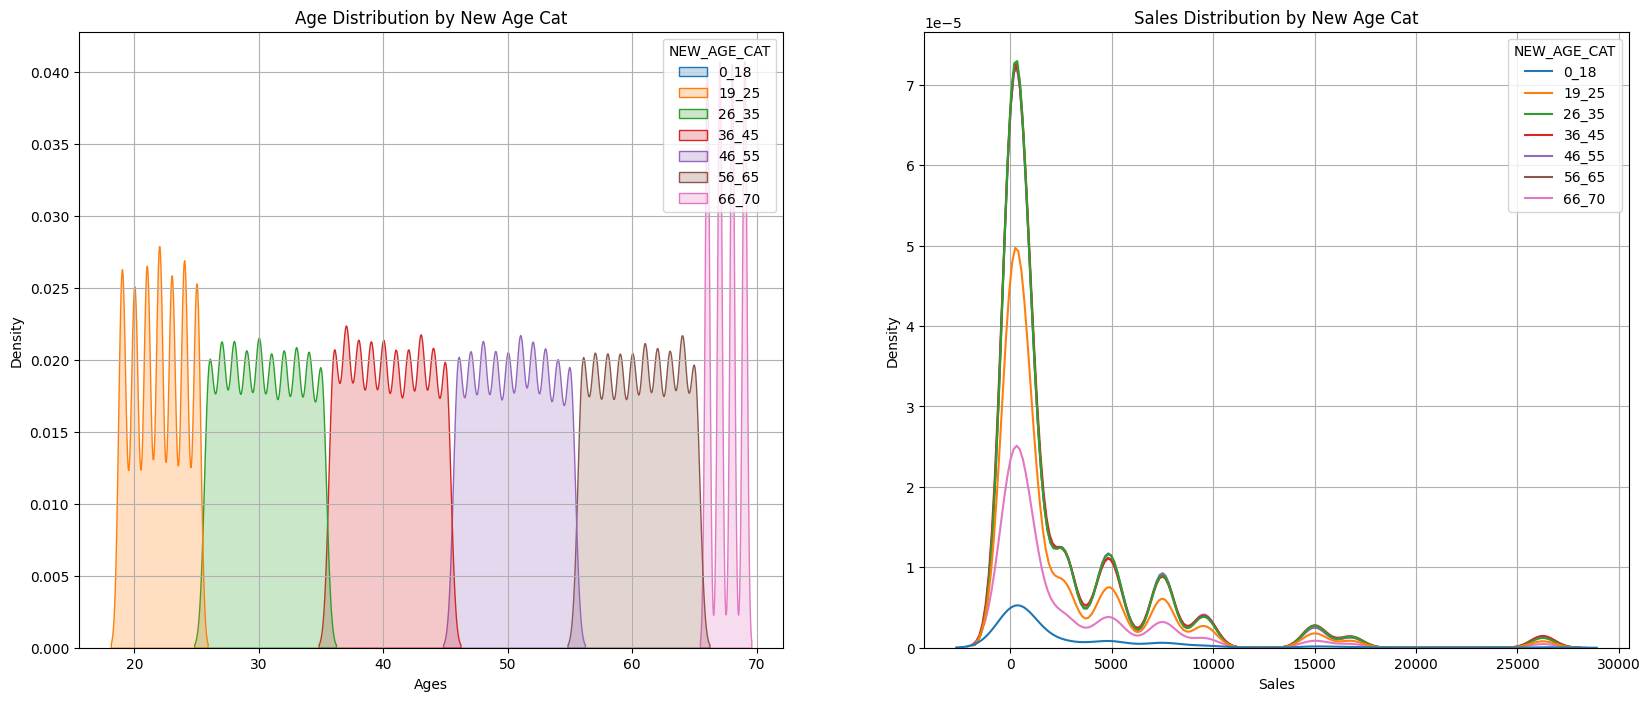

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

sns.kdeplot(x="age", hue="NEW_AGE_CAT", data=df, fill=True, ax=ax1)
sns.kdeplot(x="TotalSales", hue="NEW_AGE_CAT", data=df, ax=ax2)

ax1.set_title("Age Distribution by New Age Cat")
ax1.set_xlabel("Ages")
ax1.set_ylabel("Density")
ax1.grid(True)


ax2.set_title("Sales Distribution by New Age Cat")
ax2.set_xlabel('Sales')
ax2.set_ylabel("Density")
ax2.grid(True)

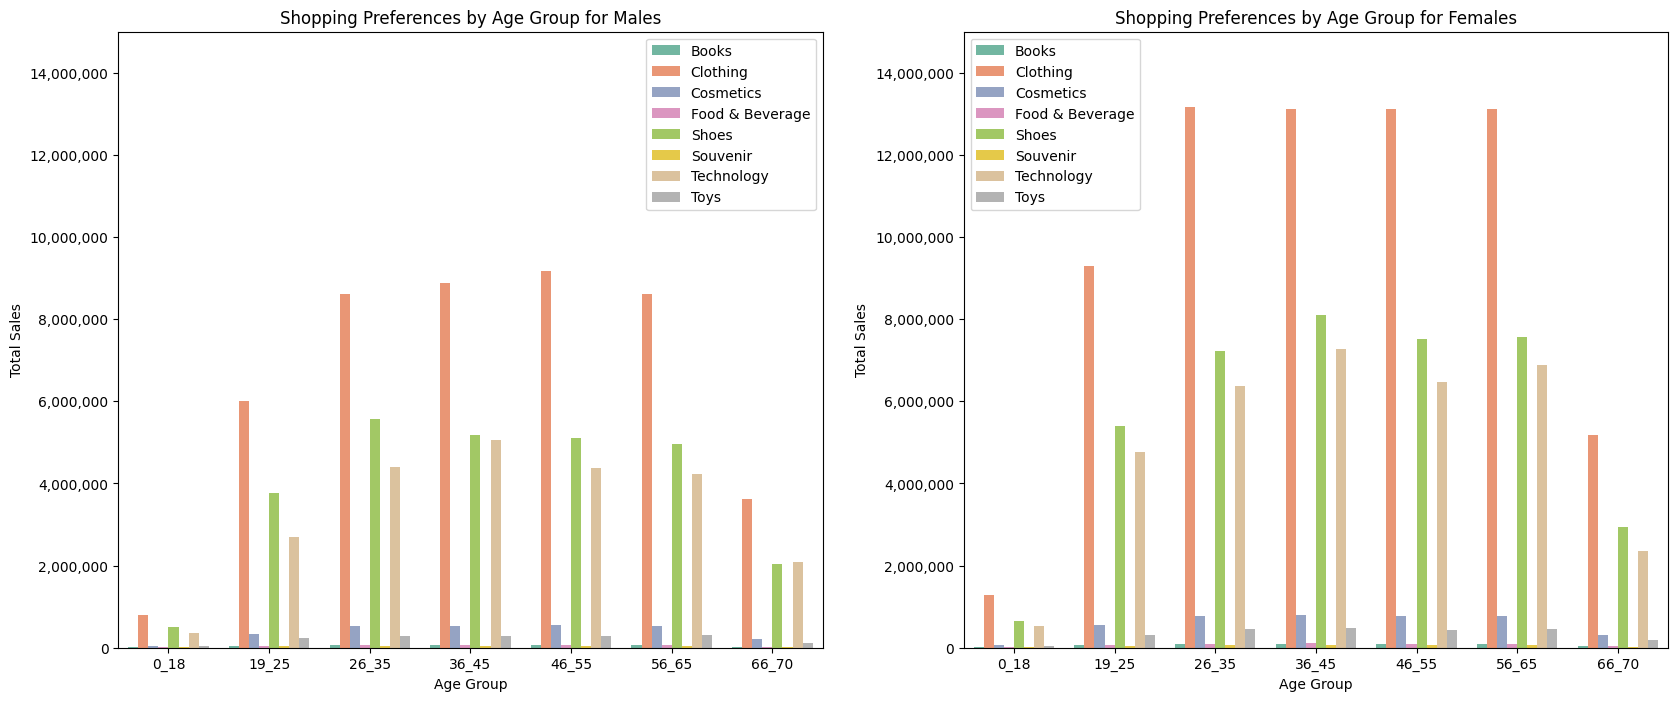

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)


grouped_ = df.groupby(['NEW_AGE_CAT', 'gender', 'category']).agg({'TotalSales':'sum'}).reset_index()


sns.barplot(x='NEW_AGE_CAT', y='TotalSales', hue='category', data=grouped_[grouped_['gender'] == 'Male'], ax=ax1, palette = 'Set2')
sns.barplot(x='NEW_AGE_CAT', y='TotalSales', hue='category', data=grouped_[grouped_['gender'] == 'Female'], ax=ax2,palette = 'Set2')


formatter = mtick.FuncFormatter(lambda x, p: format(int(x/1), ','))
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Sales')
ax1.set_ylim(0,15000000)
ax1.set_title('Shopping Preferences by Age Group for Males')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='best')
ax1.yaxis.set_major_formatter(formatter)

ax2.set_xlabel('Age Group')
ax2.set_ylabel('Total Sales')
ax2.set_ylim(0,15000000)
ax2.set_title('Shopping Preferences by Age Group for Females')

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='best')
ax2.yaxis.set_major_formatter(formatter)

plt.show()

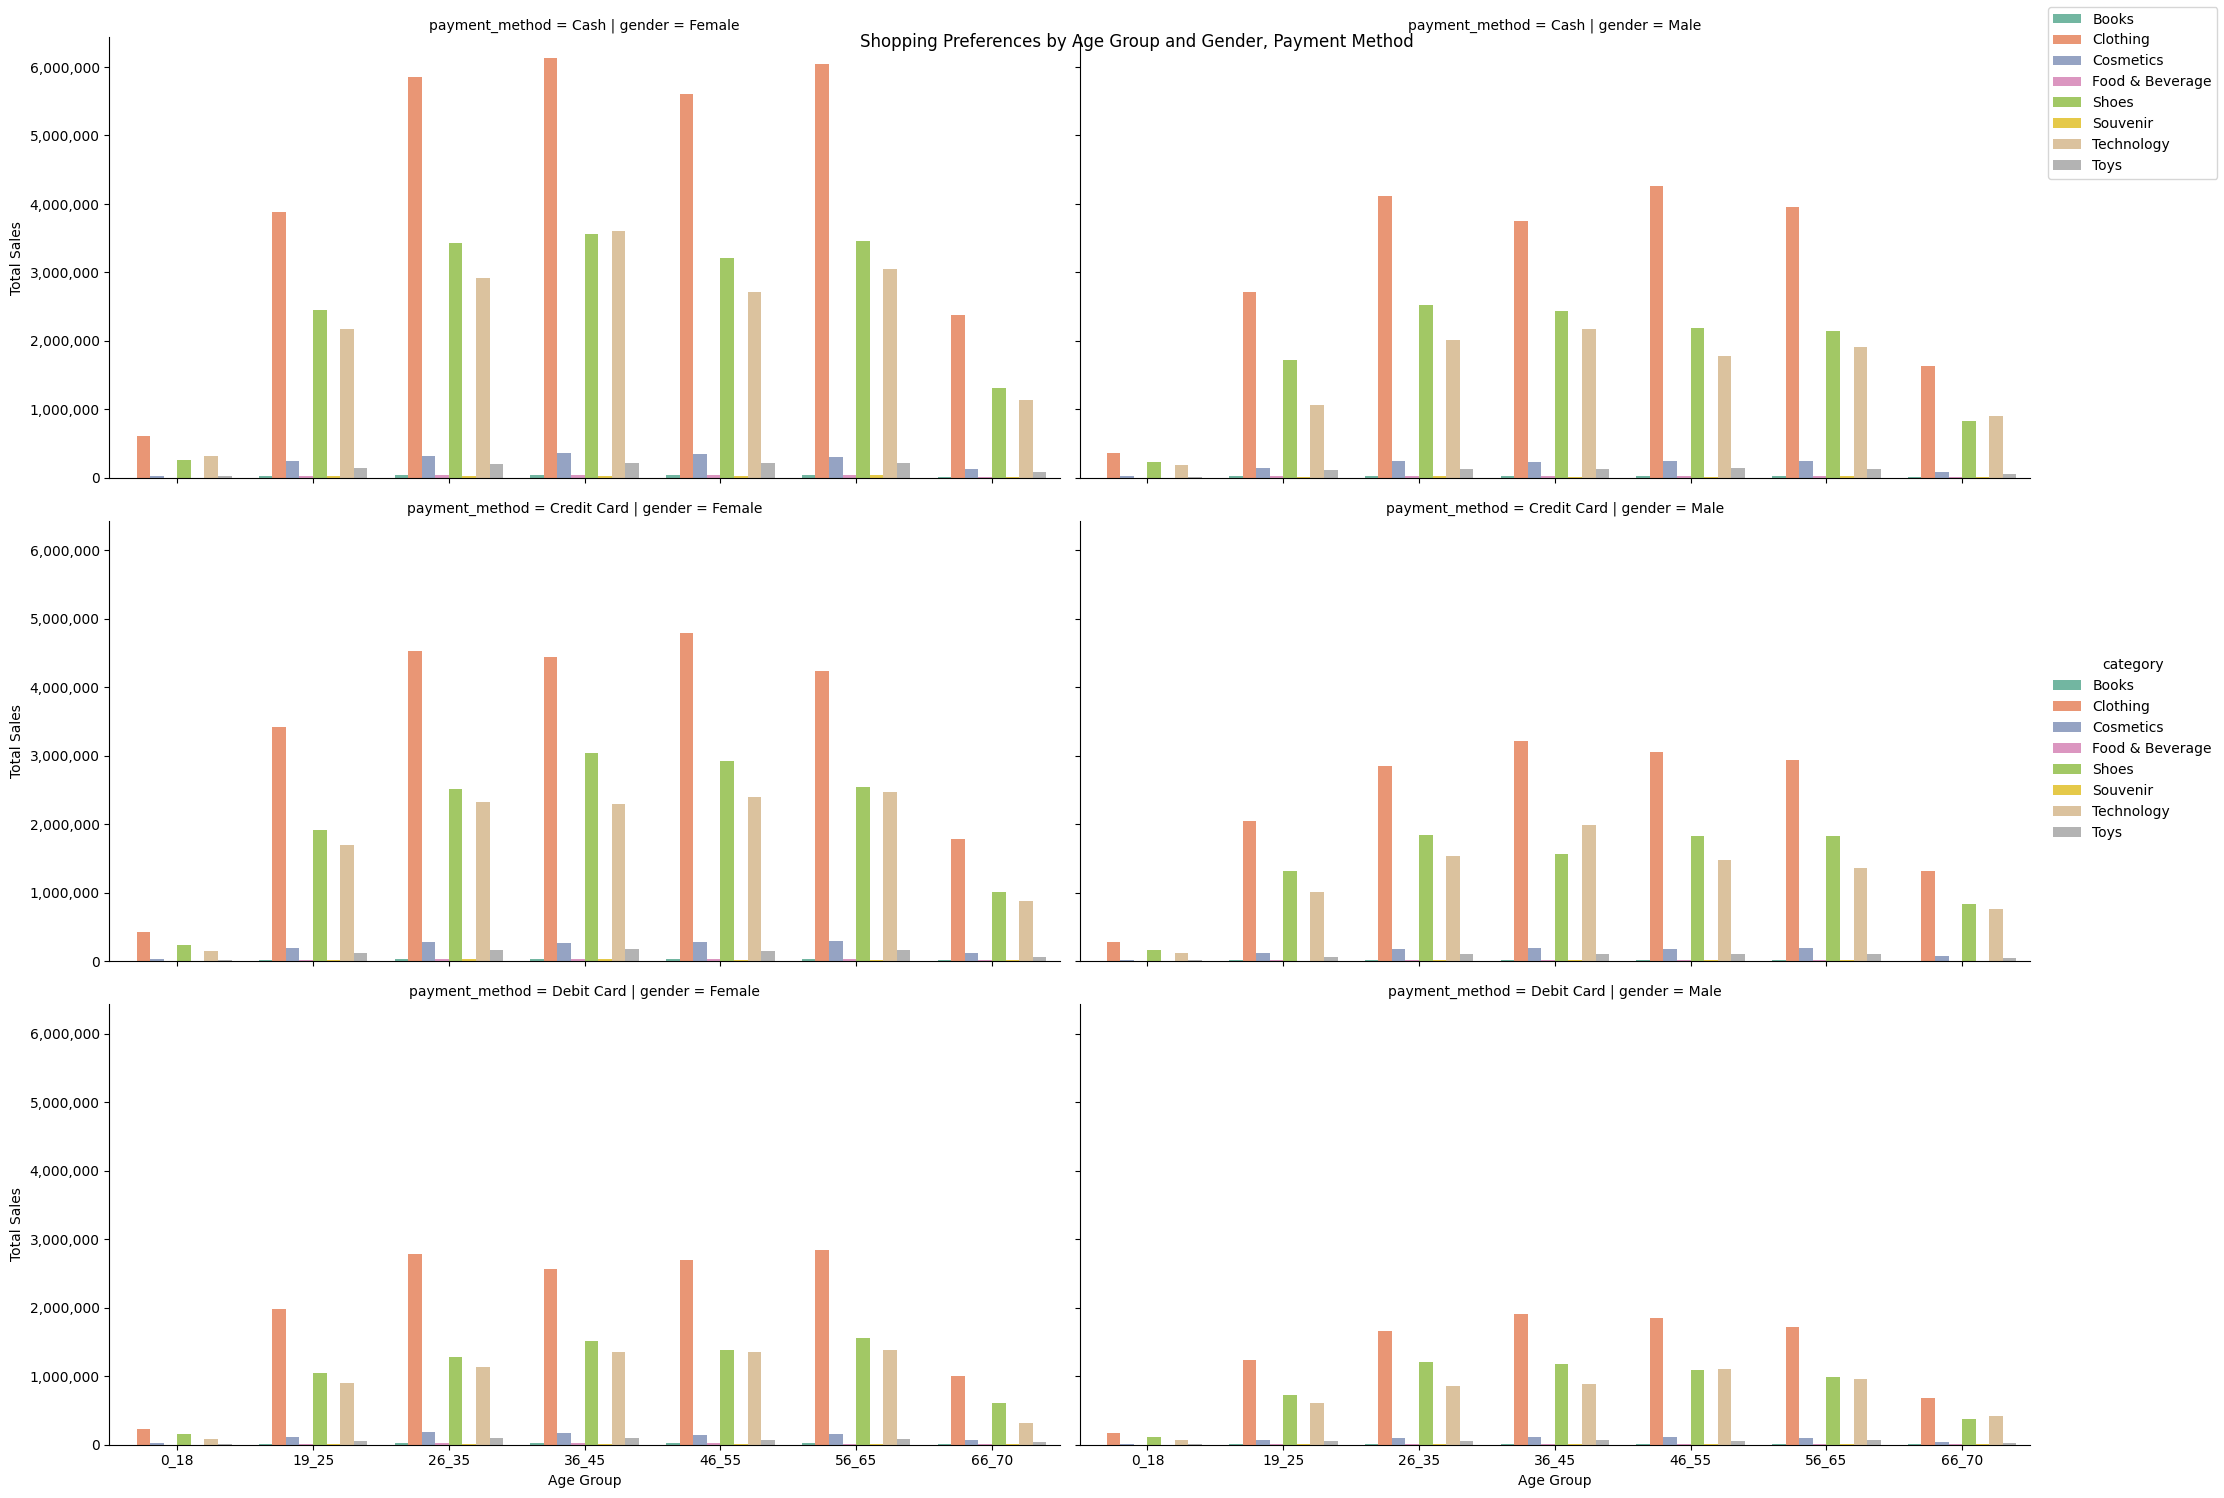

In [18]:
grouped = df.groupby(['NEW_AGE_CAT', 'gender', 'category', 'payment_method']).agg({'TotalSales':'sum'}).reset_index()


g = sns.catplot(data=grouped, x='NEW_AGE_CAT', y='TotalSales', hue='category', col='gender', row='payment_method', kind='bar', height=5, aspect=2, palette='Set2')
g.set_axis_labels("Age Group", "Total Sales")
g.fig.suptitle("Shopping Preferences by Age Group and Gender, Payment Method")


formatter = mtick.FuncFormatter(lambda x, p: format(int(x/1), ','))

for ax in g.axes.flat:

    ax.yaxis.set_major_formatter(formatter)


handles, labels = g.axes.flat[-1].get_legend_handles_labels()
g.fig.legend(handles, labels, loc='upper right')

plt.show()

In [19]:
px.box(df , y= 'TotalSales', color='category')

In [20]:
import plotly.express as px

grouped = df.groupby(['NEW_AGE_CAT', 'shopping_mall']).agg({'customer_id': 'nunique'}).reset_index()

fig = px.bar(grouped, x='shopping_mall', y='customer_id', color='NEW_AGE_CAT', barmode='group')

fig.update_layout(title='Number of Invoices by Shopping Center and Age Group')
fig.show()

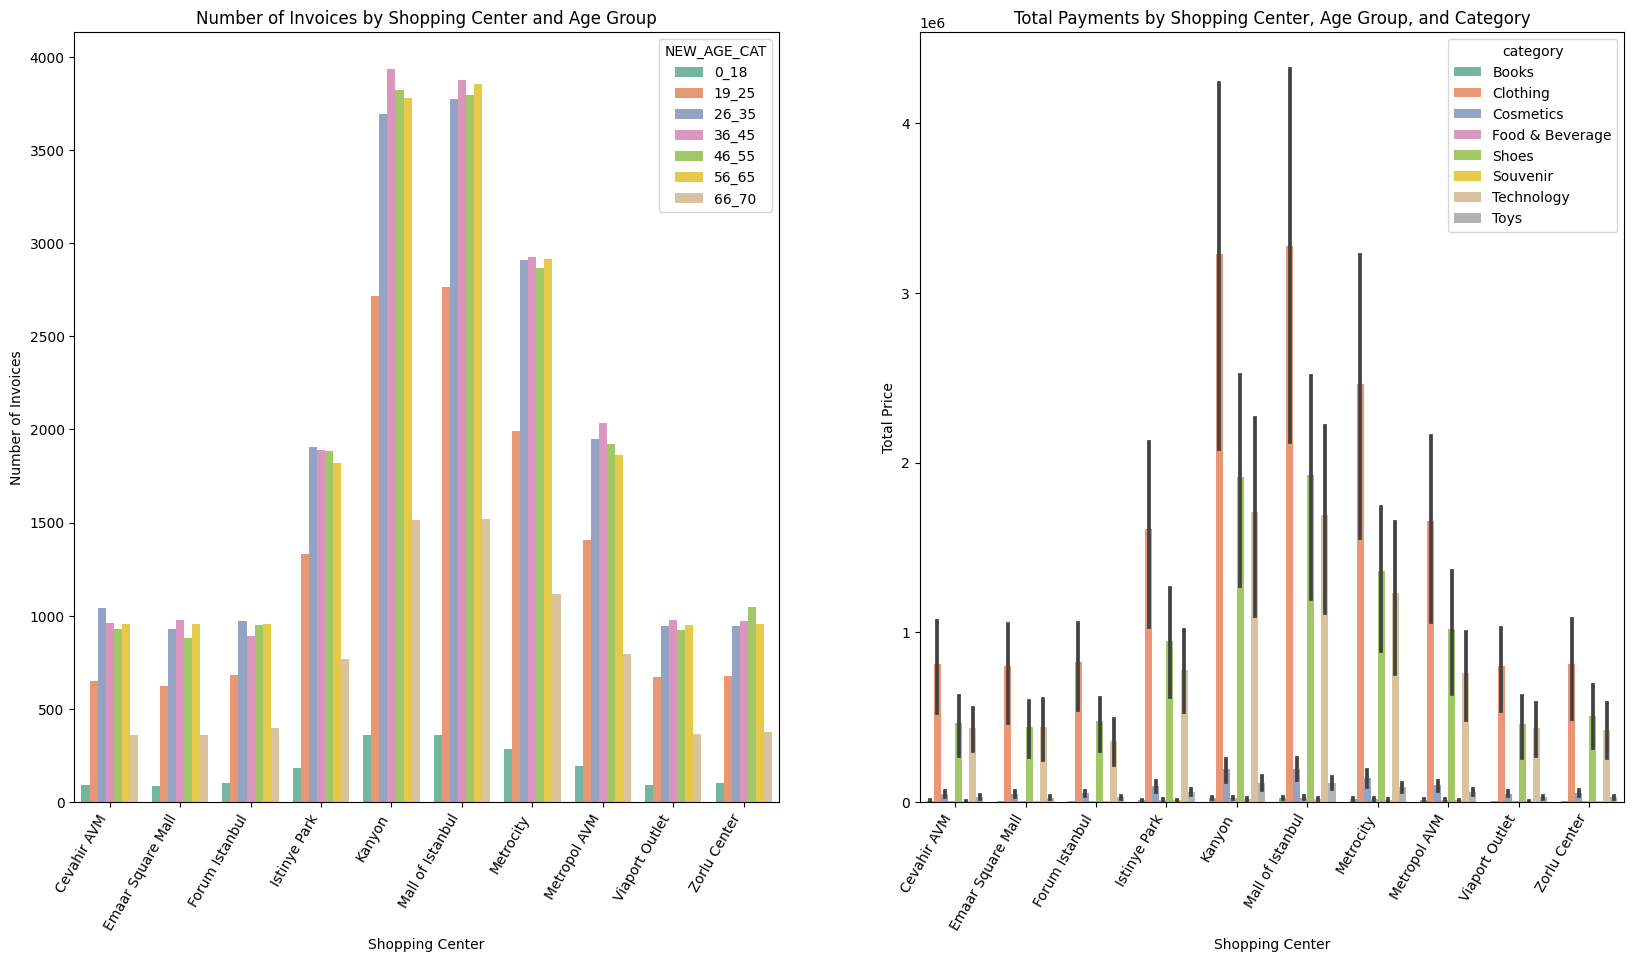

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


df_count = df.groupby(['NEW_AGE_CAT', 'shopping_mall']).agg({'invoice_no': 'count'}).reset_index()


df_total = df.groupby(['NEW_AGE_CAT', 'shopping_mall', 'category']).agg({'TotalSales': 'sum'}).reset_index()


plt.figure(figsize=(20, 10))


ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='shopping_mall', y='invoice_no', hue='NEW_AGE_CAT', data=df_count, ax=ax1, palette='Set2')

ax1.set_xlabel('Shopping Center')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=60, ha='right')
ax1.set_ylabel('Number of Invoices')
ax1.set_title('Number of Invoices by Shopping Center and Age Group')


ax2 = plt.subplot(1, 2, 2)
sns.barplot(x='shopping_mall', y='TotalSales', hue='category', data=df_total, ax=ax2, palette='Set2')

ax2.set_xlabel('Shopping Center')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60, ha='right')
ax2.set_ylabel('Total Price')
ax2.set_title('Total Payments by Shopping Center, Age Group, and Category')


plt.show()

In [22]:
df.loc[(df["shopping_mall"] == "Mall of Istanbul") , "VEHICLE_CAP(~)-MALL"] = 6500
df.loc[(df["shopping_mall"] == "Mall of Istanbul") , "SHOP_COUNT(~)-MALL"] = 350

df.loc[(df["shopping_mall"] == "Kanyon"), "VEHICLE_CAP(~)-MALL"] = 2300
df.loc[(df["shopping_mall"] == "Kanyon"), "SHOP_COUNT(~)-MALL"] = 160

df.loc[(df["shopping_mall"] == "Metrocity"), "VEHICLE_CAP(~)-MALL"] = 1200
df.loc[(df["shopping_mall"] == "Metrocity"), "SHOP_COUNT(~)-MALL"] = 175

df.loc[(df["shopping_mall"] == "Metropol AVM"), "VEHICLE_CAP(~)-MALL"] = 4000
df.loc[(df["shopping_mall"] == "Metropol AVM"), "SHOP_COUNT(~)-MALL"] = 250

df.loc[(df["shopping_mall"] == "Istinye Park"), "VEHICLE_CAP(~)-MALL"] = 3600
df.loc[(df["shopping_mall"] == "Istinye Park"), "SHOP_COUNT(~)-MALL"] = 280

df.loc[(df["shopping_mall"] == "Zorlu Center"), "VEHICLE_CAP(~)-MALL"] = 3600
df.loc[(df["shopping_mall"] == "Zorlu Center"), "SHOP_COUNT(~)-MALL"] = 200

df.loc[(df["shopping_mall"] == "Cevahir AVM"), "VEHICLE_CAP(~)-MALL"] = 2500
df.loc[(df["shopping_mall"] == "Cevahir AVM"), "SHOP_COUNT(~)-MALL"] = 224

df.loc[(df["shopping_mall"] == "Forum Istanbul"), "VEHICLE_CAP(~)-MALL"] = 5000
df.loc[(df["shopping_mall"] == "Forum Istanbul"), "SHOP_COUNT(~)-MALL"] = 265

df.loc[(df["shopping_mall"] == "Viaport Outlet"), "VEHICLE_CAP(~)-MALL"] = 3000
df.loc[(df["shopping_mall"] == "Viaport Outlet"), "SHOP_COUNT(~)-MALL"] = 150

df.loc[(df["shopping_mall"] == "Emaar Square Mall"), "VEHICLE_CAP(~)-MALL"] = 3000
df.loc[(df["shopping_mall"] == "Emaar Square Mall"), "SHOP_COUNT(~)-MALL"] = 200

In [23]:
df.groupby("shopping_mall").agg({"VEHICLE_CAP(~)-MALL" : "mean",
                                "SHOP_COUNT(~)-MALL": "mean"}).sort_values(by =["VEHICLE_CAP(~)-MALL", "SHOP_COUNT(~)-MALL"], ascending = False)

,VEHICLE_CAP(~)-MALL,SHOP_COUNT(~)-MALL
shopping_mall,,
Mall of Istanbul,6500.00,350.00
Forum Istanbul,5000.00,265.00
Metropol AVM,4000.00,250.00
Istinye Park,3600.00,280.00
Zorlu Center,3600.00,200.00
Emaar Square Mall,3000.00,200.00
Viaport Outlet,3000.00,150.00
Cevahir AVM,2500.00,224.00
Kanyon,2300.00,160.00


In [24]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['Year'] = df['invoice_date'].dt.year
df['Month'] = df['invoice_date'].dt.month
df['DayOfWeek'] = df['invoice_date'].dt.day_name()

<ipython-input-24-2cba95b2fa0c>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



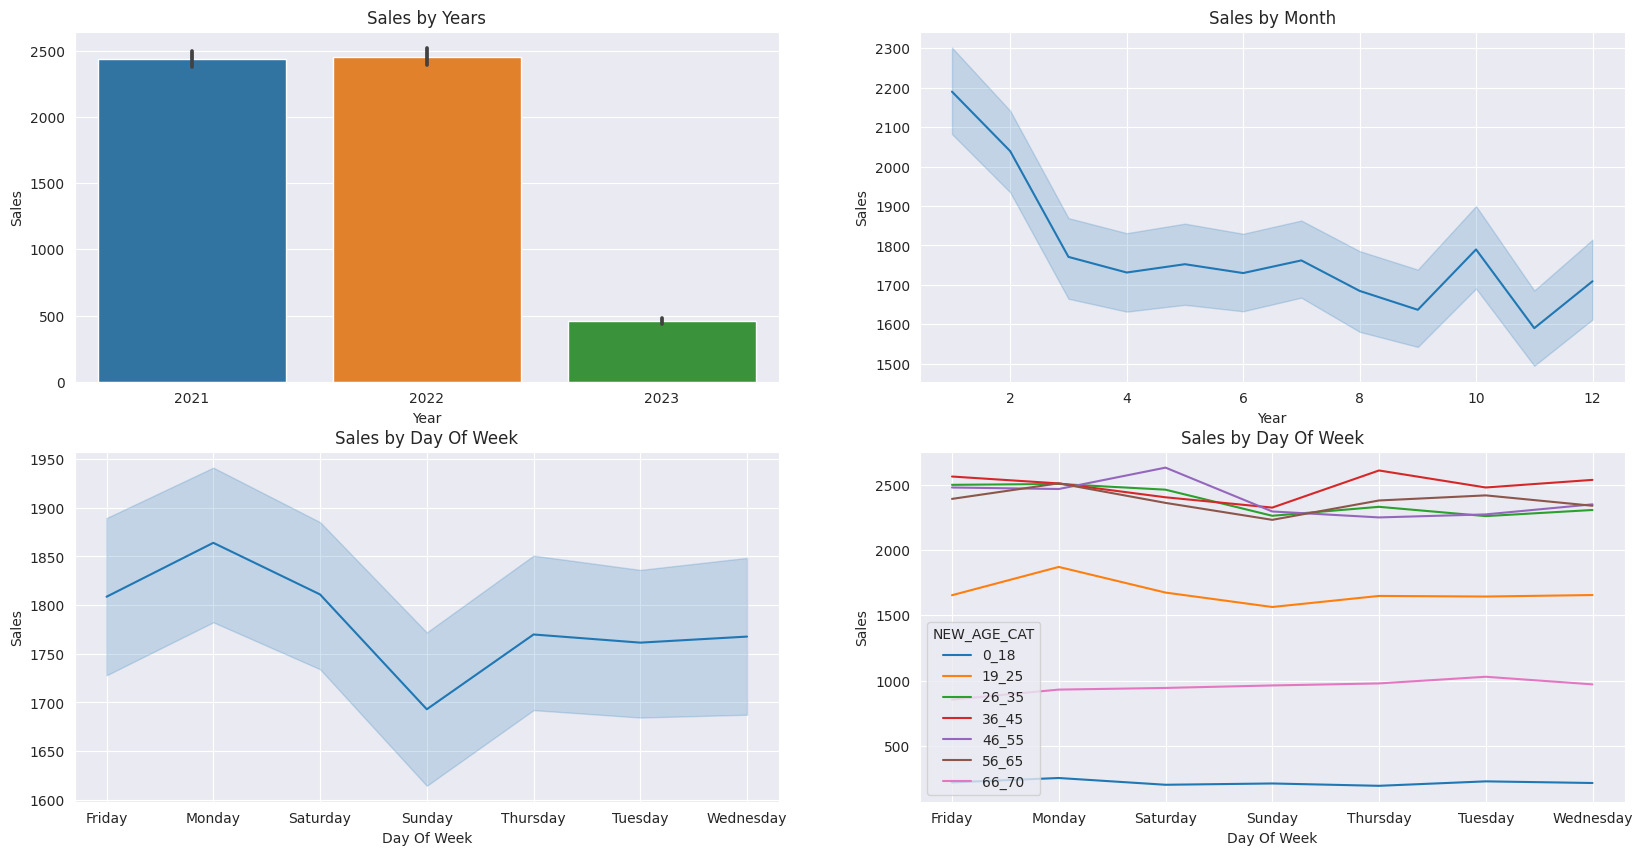

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 =  plt.subplot(2,2,4)



df_sales = df.groupby(['Year', 'Month', 'DayOfWeek', 'NEW_AGE_CAT','shopping_mall','category']).agg({'TotalSales':'sum'}).reset_index()

sns.barplot(data=df_sales, x="Year", y="TotalSales", ax= ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Sales")
ax1.set_title("Sales by Years")

sns.lineplot(data=df_sales, x="Month", y="TotalSales", ax= ax2)
ax2.set_xlabel("Year")
ax2.set_ylabel("Sales")
ax2.set_title("Sales by Month")

sns.lineplot(data=df_sales, x="DayOfWeek", y="TotalSales", ax= ax3)
ax3.set_xlabel("Day Of Week")
ax3.set_ylabel("Sales")
ax3.set_title("Sales by Day Of Week")


sns.lineplot(data=df_sales, x="DayOfWeek", y="TotalSales", hue = 'NEW_AGE_CAT', errorbar = None, ax= ax4)
ax4.set_xlabel("Day Of Week")
ax4.set_ylabel("Sales")
ax4.set_title("Sales by Day Of Week")


plt.show()